In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

> Below are the decorator functions. No need to change.

In [22]:
def teams_n_participants():
    """ Contains the Teams for World Cup 2022 and the names of participants in the sweepstakes.
        Is called by main sorting function. Returns both lists."""
    
    teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 
             'Saudi-Arabia', 'Mexico', 'Poland','France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa-Rica',
             'Germany', 'Japan',  'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil',' Serbia', 'Switzerland',
             'Cameroon', ' Portugal', 'Ghana', 'Uruguay', 'South-Korea']
    
    ##############################################################################################################
    ################## =====> S E T _ T H E  _ P A R T I C I P A N T S _ H E R E <=====  #########################
    ##############################################################################################################
    participants  = [
        'James', 'Nat', 'Josh', 'Jack', 'Becca', 'Libby', 'Julian'
                    ]
    ##############################################################################################################
    
    return teams, participants

def odds():
    odds_dict = {'Qatar':501, 'Ecuador':251, 'Senegal':126, 'Netherlands':12, 'England':8, 'Iran':501, 'USA':126, 
                 'Wales':126, 'Argentina':6.5,'Saudi-Arabia':501, 'Mexico':91, 'Poland':176,'France':8, 
                 'Australia':501, 'Denmark':23, 'Tunisia':501, 'Spain':8.5, 'Costa-Rica':501,'Germany':11, 
                 'Japan':301,  'Belgium':17, 'Canada':301, 'Morocco':301, 'Croatia':36, 'Brazil':4.5,' Serbia':91,
                 'Switzerland':91,'Cameroon':301, ' Portugal':15, 'Ghana':301, 'Uruguay':36, 'South-Korea':301}
    
    for team, odd in odds_dict.items():
        odds_dict[team] = 1/(odd-1)
    
    return odds_dict
        
def return_odds(teamlist):
    """Return the approximate odds of a dictionary"""
    odds_dict     = odds()
    odds_combined = [odds_dict[i] for i in teamlist]
    total         = round(sum(odds_combined),2)
    return str(total)
        

def clarify(indict):
    """Function to print the teams each participant was given in a more readible way"""
    names, teams = list(indict.keys()), list(indict.values())
    oddsy = {}
    for i in range(len(names)):
        print(names[i], 'got --> ', *teams[i], '('+return_odds(teams[i])+')')
        oddsy[names[i]] = float(return_odds(teams[i]))
        
    return oddsy

def plot_chances():
    fig,ax=plt.subplots(figsize=(8, 4), dpi=150)
    ax.bar(list(odds_pp.keys()), list(odds_pp.values()))
    ax.set_ylim(1e-3, 1e0)
    ax.set_yscale('log')
    ax.set_title("Likelihood of Winning")

    #add teams to bar 
    for i, v in enumerate(list(odds_pp.keys())):
        tms = FINAL_TEAMS[v]
        tms_string = '\n'.join(tms)
        ax.text(i-0.3, odds_pp[v]/4, tms_string, color='white', fontsize=6)

In [23]:
def MAIN(TEAMS='ALL', VERBOSE=False):
        #test the inputs 
        teams, participants = teams_n_participants()
        MAX_PP              = int(len(teams)/len(participants))
        print('Max number of teams pp for this participant list is', MAX_PP)

        if TEAMS == 'ALL':
            #all teams will be divied out evenly but participants cannot exceed teams
            if len(teams) < len(participants):
                print('========= Error =========')
                print('Too many teams per person')
                print('=========================')
            else:
                team_lists = FILL_FUNC(TEAMS=TEAMS, VERBOSE=VERBOSE)
        elif type(TEAMS) == int:
            #check that MAX_pp not exceeded
            if TEAMS > MAX_PP:
                print('========= Error =========')
                print('Too many teams per person')
                print('=========================')
            else:
                team_lists = FILL_FUNC(TEAMS=TEAMS, VERBOSE=VERBOSE)

        return team_lists

def FILL_FUNC(TEAMS, VERBOSE):
    """
    
    1. The participant names are placed into a dictionary. The order of this is randomised. 
    2. Code will iterate through the names in dict entry order, then bounce back in reverse order
    3. During iteration of names a team will be assigned randomly to the name by appending to the dict value (list)
    
    4. Two options are available for assigning teams:
    If TEAMS = ALL the entire teams list will be distributed amongst the participants. 
    
    If TEAMS = type(int) then only (int) teams will be distributed per person.
    
    5. Once all teams required have been assigned, the function returns the dictionary team_lists with keys that 
    are participant names, and values that are a list of teams.
    
    """
        
    
    #get the teams and names. Team_lists is the final dictionary
    teams, participants = teams_n_participants()
    team_lists  = {}
    forwards= range(len(participants))
    backwards = forwards[::-1]
    ticker    = 0
    
    #randomly generate order of dictionary 
    while len(participants) > 0:
        a = random.randint(0,len(participants)-1)
        team_lists[participants[a]] = []
        participants.pop(a)
    print("Randomly sorted the dictionary into this order:\n", [i for i in team_lists.keys()])
    print()

    teams, participants = teams_n_participants()
    if TEAMS == 'ALL':
        while len(teams) > 0:

            #set the order of names to forwards on first run 
            if ticker == 0: 
                order  = forwards

            #otherwise rotate between forwards backwards 
            elif ticker %len(participants) == 0 and order != forwards:
                order  = forwards
                ticker = 0
                if VERBOSE==True:
                    print('going forwards')
            elif ticker %len(participants) == 0 and order != backwards:
                order  = backwards
                ticker = 0
                if VERBOSE==True:
                    print('going backwards')

            name    = list(team_lists.keys())[order[ticker]]
            ticker +=1

            #retrieve random team 
            a = random.randint(0,len(teams)-1)
            team = teams[a]
            teams.pop(a)

            #assign team to name in team_lists
            team_lists[name].append(team)

        if VERBOSE==True:
            print('Assigned', name, team)
        
    elif type(TEAMS) == int:
        complete = {}
        for i in participants:
            complete[i] = 'No'
        while 'No' in complete.values():
        
            #set the order of names to forwards on first run 
            if ticker == 0: 
                order  = forwards

            #otherwise rotate between forwards backwards 
            elif ticker %len(participants) == 0 and order != forwards:
                order  = forwards
                ticker = 0
                if VERBOSE==True:
                    print('going forwards')
            elif ticker %len(participants) == 0 and order != backwards:
                order  = backwards
                ticker = 0
                if VERBOSE==True:
                    print('going backwards')

            name    = list(team_lists.keys())[order[ticker]]
            
            if len(team_lists[name]) == TEAMS:
                complete[name] = 'Yes'
#                 print('finished', name)
                ticker  +=1
            else:
                ticker  +=1
                #retrieve random team 
                a = random.randint(0,len(teams)-1)
                team = teams[a]
                teams.pop(a)

                #assign team to name in team_lists
                team_lists[name].append(team)

                if VERBOSE==True:
                    print('Assigned', name, team)
                    
    
    return team_lists
        

### You can run some example test runs below

In [24]:
def output_test_runs(runs):
    for R in range(runs):
        print('------------------------------------------------------------------', '<-- RUN', R+1, )
        a = random.randint(1,4)
        print('Randomly setting the teams per person to:', a)
        boys = MAIN(TEAMS=a)
        clarify(boys)
        
#would you like to run some examples?  
# output_test_runs(3)

## Main routine to determine distribution... Are you ready?

Max number of teams pp for this participant list is 4
Randomly sorted the dictionary into this order:
 ['James', 'Becca', 'Jack', 'Josh', 'Julian', 'Nat', 'Libby']


James got -->  Mexico Morocco Cameroon South-Korea (0.02)
Becca got -->  Netherlands  Serbia Poland Uruguay (0.14)
Jack got -->  England Senegal Brazil Qatar (0.44)
Josh got -->  Germany Switzerland Australia Canada (0.12)
Julian got -->  Iran Tunisia Ecuador Japan (0.01)
Nat got -->   Portugal Argentina Croatia Costa-Rica (0.28)
Libby got -->  France Denmark Wales Belgium (0.26)


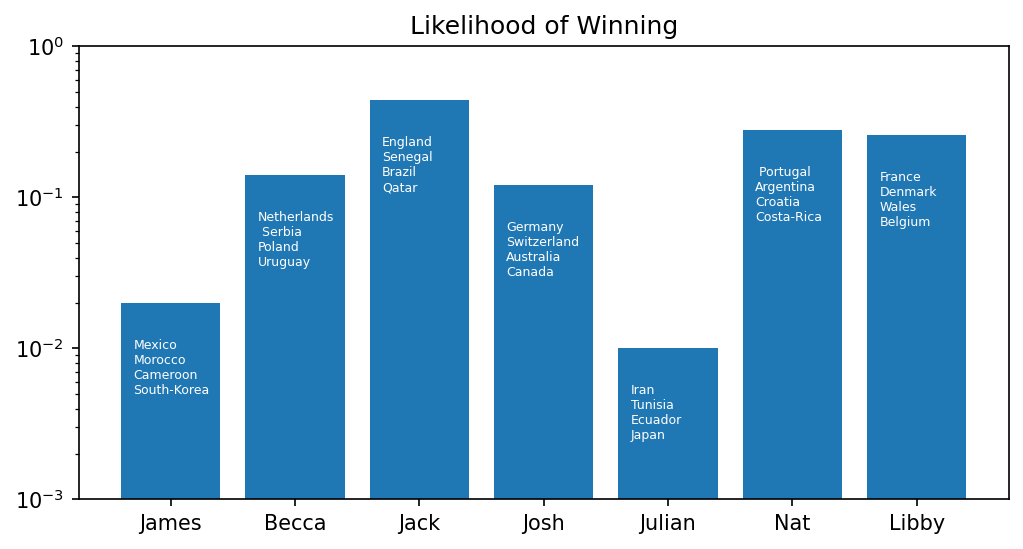

In [25]:
#############################
FINAL_TEAMS = MAIN(TEAMS=4)
print()
odds_pp = clarify(FINAL_TEAMS)
plot_chances()
#############################